In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn . preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from sklearn . linear_model import LogisticRegression


In [2]:
df1 = pd.read_csv("/Users/haowu/Desktop/Boston University Graduate Study/CS 677/assignment 2/HA.csv")

In [3]:
df1.drop('Weekday', axis=1, inplace=True)
df1.head(10)

,Date,Year,Month,Day,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2015-01-02,2015,1,2,0,2015-00,26.21,26.27,24.92,25.27,1439700.0,24.35,0.000000,24.350000,24.350000
1,2015-01-05,2015,1,5,1,2015-01,25.28,25.60,24.91,25.09,1660300.0,24.17,-0.007123,24.260000,24.260000
2,2015-01-06,2015,1,6,1,2015-01,25.25,25.51,23.80,24.24,2426400.0,23.36,-0.033878,23.960000,23.960000
3,2015-01-07,2015,1,7,1,2015-01,24.39,24.96,24.17,24.35,1139500.0,23.46,0.004538,23.835000,23.835000
4,2015-01-08,2015,1,8,1,2015-01,24.85,25.95,24.63,25.53,1476900.0,24.60,0.048460,23.988000,23.988000
5,2015-01-09,2015,1,9,1,2015-01,25.68,25.89,25.00,25.13,818500.0,24.21,-0.015668,24.025000,24.025000
6,2015-01-12,2015,1,12,2,2015-02,25.05,25.22,24.03,24.22,1078900.0,23.34,-0.036211,23.927143,23.927143
7,2015-01-13,2015,1,13,2,2015-02,24.46,24.90,24.00,24.37,750300.0,23.48,0.006193,23.871250,23.871250
8,2015-01-14,2015,1,14,2,2015-02,24.20,24.26,23.23,23.79,942100.0,22.92,-0.023800,23.765556,23.765556
9,2015-01-15,2015,1,15,2,2015-02,23.80,24.78,23.80,24.21,1139200.0,23.33,0.017654,23.722000,23.722000


In [4]:
df1.loc[:,"Profit"] = df1.loc[:,"Open"] - df1.loc[:,"Close"]
index_name = df1[ (df1["Week_Number"] < 1 )].index
df1.drop(index_name, inplace = True)
df1.head()

,Date,Year,Month,Day,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,Profit
1,2015-01-05,2015,1,5,1,2015-01,25.28,25.60,24.91,25.09,1660300.0,24.17,-0.007123,24.260,24.260,0.19
2,2015-01-06,2015,1,6,1,2015-01,25.25,25.51,23.80,24.24,2426400.0,23.36,-0.033878,23.960,23.960,1.01
3,2015-01-07,2015,1,7,1,2015-01,24.39,24.96,24.17,24.35,1139500.0,23.46,0.004538,23.835,23.835,0.04
4,2015-01-08,2015,1,8,1,2015-01,24.85,25.95,24.63,25.53,1476900.0,24.60,0.048460,23.988,23.988,-0.68
5,2015-01-09,2015,1,9,1,2015-01,25.68,25.89,25.00,25.13,818500.0,24.21,-0.015668,24.025,24.025,0.55


In [6]:
true_label = []
for value in df1["Profit"]:
    if value >= 0:
        true_label.append("Buy")
    if value < 0:
        true_label.append("Hold")
df1["Buy_or_Sell"] = true_label
df1.head()

,Date,Year,Month,Day,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,Profit,Buy_or_Sell
1,2015-01-05,2015,1,5,1,2015-01,25.28,25.60,24.91,25.09,1660300.0,24.17,-0.007123,24.260,24.260,0.19,Buy
2,2015-01-06,2015,1,6,1,2015-01,25.25,25.51,23.80,24.24,2426400.0,23.36,-0.033878,23.960,23.960,1.01,Buy
3,2015-01-07,2015,1,7,1,2015-01,24.39,24.96,24.17,24.35,1139500.0,23.46,0.004538,23.835,23.835,0.04,Buy
4,2015-01-08,2015,1,8,1,2015-01,24.85,25.95,24.63,25.53,1476900.0,24.60,0.048460,23.988,23.988,-0.68,Hold
5,2015-01-09,2015,1,9,1,2015-01,25.68,25.89,25.00,25.13,818500.0,24.21,-0.015668,24.025,24.025,0.55,Buy


In [15]:
S = 100
Cummut = []
for i in df1["Profit"]:
    S += i
    Cummut.append(S)
df1["Cummut"] = Cummut
df1.head()

,Date,Year,Month,Day,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,Profit,Buy_or_Sell,Cummut
1,2015-01-05,2015,1,5,1,2015-01,25.28,25.60,24.91,25.09,1660300.0,24.17,-0.007123,24.260,24.260,0.19,Buy,100.19
2,2015-01-06,2015,1,6,1,2015-01,25.25,25.51,23.80,24.24,2426400.0,23.36,-0.033878,23.960,23.960,1.01,Buy,101.20
3,2015-01-07,2015,1,7,1,2015-01,24.39,24.96,24.17,24.35,1139500.0,23.46,0.004538,23.835,23.835,0.04,Buy,101.24
4,2015-01-08,2015,1,8,1,2015-01,24.85,25.95,24.63,25.53,1476900.0,24.60,0.048460,23.988,23.988,-0.68,Hold,100.56
5,2015-01-09,2015,1,9,1,2015-01,25.68,25.89,25.00,25.13,818500.0,24.21,-0.015668,24.025,24.025,0.55,Buy,101.11


In [16]:
df1.groupby("Week_Number")

In [27]:
a = df1.groupby(["Year","Week_Number"])["Cummut"].mean()
b = pd.DataFrame(a)
b

Cummut
Year Week_Number         
2015 1            100.860
     2            102.092
     3            100.975
     4            100.878
     5            103.888
...                   ...
2019 48           111.882
     49           112.290
     50           111.710
     51           111.900
     52           113.180

[260 rows x 1 columns]

Text(0, 0.5, 'Error Rate ')

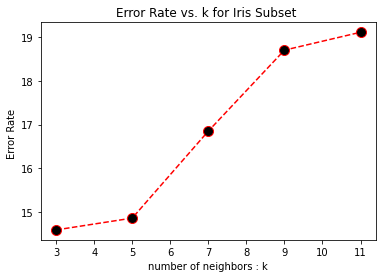

In [48]:
iris_feature_names = ["Cummut"]
X = df1[iris_feature_names]. values
scaler = StandardScaler ()
scaler .fit(X)
X = scaler . transform (X)
le = LabelEncoder ()
Y = le.fit_transform ( df1["Week_Number"]. values )
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5 , random_state =3)
error_rate = []
for k in range(3,12,2):
    knn_classifier = KNeighborsClassifier ( n_neighbors =k)
    knn_classifier.fit ( X_train , Y_train )
    prediction = knn_classifier . predict ( X_test )
    error_rate.append(np. mean( prediction))
ax = plt.gca ()
ax.xaxis.set_major_locator(MaxNLocator(integer = True ))
plt.plot ( range (3 ,12 ,2) , error_rate , color ="red", linestyle ="dashed", marker ="o", markerfacecolor ="black", markersize =10)
plt.title ("Error Rate vs. k for Iris Subset ")
plt.xlabel ("number of neighbors : k")
plt.ylabel ("Error Rate ")